In [1]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
listings_files = ([f for f in os.listdir('files') 
                   if re.compile('.*(listings)').match(f)])
listings_dict = dict(zip([re.compile('.*(?=_)').match(city)[0] 
                          for city in listings_files],listings_files))

In [3]:
listings_dict

{'bergamo': 'bergamo_listings.csv.gz',
 'bologna': 'bologna_listings.csv.gz',
 'florence': 'florence_listings.csv.gz',
 'milan': 'milan_listings.csv.gz',
 'naples': 'naples_listings.csv.gz',
 'puglia': 'puglia_listings.csv.gz',
 'rome': 'rome_listings.csv.gz',
 'sicily': 'sicily_listings.csv.gz',
 'trentino': 'trentino_listings.csv.gz',
 'venice': 'venice_listings.csv.gz'}

In [4]:
df_listings = pd.DataFrame()
for x in listings_dict:
    df_province = pd.read_csv('files/'+listings_dict[x])
    df_province['province'] = x
    
    df_listings = pd.concat([df_listings,df_province], axis=0, join='outer',
                            ignore_index=False, keys=None, levels=None,
                            names=None, verify_integrity=False, copy=True)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (43,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (43,61,62,95) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
for i in df_listings.columns:
    print(i)

id
listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
access
interaction
house_rules
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_ni

In [11]:
cols = ['id', 'price', 
        'review_scores_rating', 'review_scores_accuracy', 
        'review_scores_cleanliness', 'review_scores_checkin',
        'review_scores_communication', 'review_scores_location',
        'review_scores_value', 'minimum_nights', 'maximum_nights',
        'room_type', 'accommodates', 'bedrooms', 'beds',
        'bed_type', 'province', 'city', 'street', 'latitude', 'longitude']

In [12]:
df = df_listings[cols]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179612 entries, 0 to 8651
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           179612 non-null  int64  
 1   price                        179612 non-null  float64
 2   review_scores_rating         119596 non-null  float64
 3   review_scores_accuracy       119459 non-null  float64
 4   review_scores_cleanliness    119494 non-null  float64
 5   review_scores_checkin        119386 non-null  float64
 6   review_scores_communication  119433 non-null  float64
 7   review_scores_location       119384 non-null  float64
 8   review_scores_value          119369 non-null  float64
 9   minimum_nights               179612 non-null  int64  
 10  maximum_nights               179612 non-null  int64  
 11  room_type                    179612 non-null  object 
 12  accommodates                 179612 non-null  int64  
 13  b

In [17]:
prices = ['price']

for i in prices:
    try:
        df[i] = df[i].str.replace('$','')
        df[i] = df[i].str.replace(',','')
        df[i] = df[i].astype('float')
    except:
        pass

In [20]:
df

,id,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,minimum_nights,...,room_type,accommodates,bedrooms,beds,bed_type,province,city,street,latitude,longitude
0,15526,82.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,3,...,Entire home/apt,5,2.0,4.0,Real Bed,bergamo,Solto Collina,"Solto Collina, Lombardia, Italy",45.78464,10.02629
1,15542,59.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,3,...,Entire home/apt,3,1.0,2.0,Real Bed,bergamo,Solto Collina,"Solto Collina, Lombardy, Italy",45.78354,10.02471
2,31412,69.0,96.0,10.0,10.0,9.0,10.0,9.0,9.0,1,...,Entire home/apt,4,1.0,2.0,Real Bed,bergamo,Bergamo,"Bergamo, Lombardy, Italy",45.69052,9.67099
3,116423,41.0,95.0,9.0,9.0,10.0,9.0,10.0,10.0,10,...,Entire home/apt,4,2.0,4.0,Real Bed,bergamo,Bossico,"Bossico, Lombardia, Italy",45.82840,10.04476
4,130750,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,...,Entire home/apt,4,1.0,6.0,Real Bed,bergamo,Calchera-frontale,"Calchera-frontale, Lombardia, Italy",45.83829,9.51059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8647,43742118,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,Entire home/apt,6,2.0,6.0,Real Bed,venice,Venezia,"Venice, Veneto, Italy",45.48634,12.24323
8648,43742746,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,Entire home/apt,3,2.0,2.0,Real Bed,venice,Venezia,"Venice, Veneto, Italy",45.43176,12.32329
8649,43748698,123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,Entire home/apt,7,2.0,4.0,Real Bed,venice,Venezia,"Venice, Veneto, Italy",45.43558,12.34741
8650,43753717,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,Entire home/apt,4,2.0,3.0,Real Bed,venice,Venezia,"Venice, Veneto, Italy",45.43591,12.33877


In [21]:
df.to_csv('listings.csv')

In [4]:
df = pd.read_csv('listings_ohe.csv')

# Clustering Libraries

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import calinski_harabasz_score, silhouette_score
from IPython.display import HTML
from scipy.spatial.distance import euclidean, cityblock
from sklearn.base import clone
from pyclustering.cluster.kmedians import kmedians
from pyclustering.cluster.kmedoids import kmedoids

In [6]:
standard_scaler = StandardScaler()
X_listings = standard_scaler.fit_transform(df)

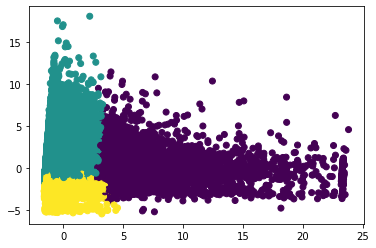

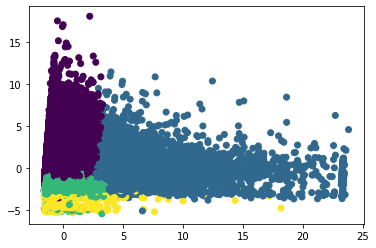

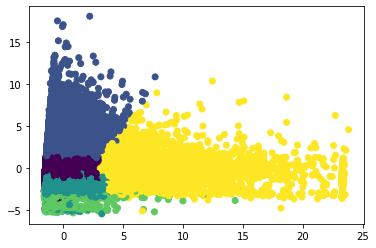

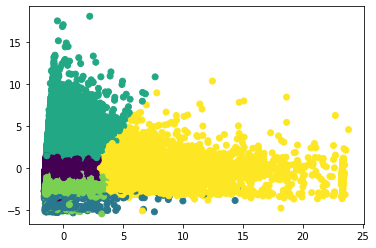

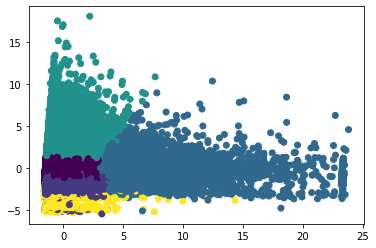

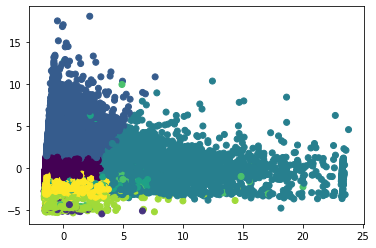

In [85]:
for n in [3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=n, random_state=1337)
    y_predict = kmeans.fit_predict(X_listings)
    plt.scatter(X_listings_new[:,0], X_listings_new[:,1], c=y_predict)
    plt.show();

# Internal Validations

In [18]:
# Pooled with SSD
def pooled_within_ssd(X, y, centroids, dist):
    """Compute pooled within-cluster sum of squares around the cluster mean
    
    Parameters
    ----------
    X : array
        Design matrix with each row corresponding to a point
    y : array
        Class label of each point
    centroids : array
        Number of pairs to sample
    dist : callable
        Distance between two points. It should accept two arrays, each 
        corresponding to the coordinates of each point
        
    Returns
    -------
    float
        Pooled within-cluster sum of squares around the cluster mean
    """
    y = y.astype(int)
    total = np.bincount(y)
    result = 0
    
    for x, y in zip (X, y):
        result += (dist(x, centroids[y])**2/(2*total[y]))
    
    return result

# Gap Statistic
def gap_statistic(X, y, centroids, dist, b, clusterer, random_state=None):
    """Compute the gap statistic
    
    Parameters
    ----------
    X : array
        Design matrix with each row corresponding to a point
    y : array
        Class label of each point
    centroids : array
        Number of pairs to sample
    dist : callable
        Distance between two points. It should accept two arrays, each 
        corresponding to the coordinates of each point
    b : int
        Number of realizations for the reference distribution
    clusterer : KMeans
        Clusterer object that will be used for clustering the reference 
        realizations
    random_state : int, default=None
        Determines random number generation for realizations
        
    Returns
    -------
    gs : float
        Gap statistic
    gs_std : float
        Standard deviation of gap statistic
    """
    rng = np.random.default_rng(random_state)
    
    ssd = np.log(pooled_within_ssd(X, y, centroids, dist))
    stats = np.array([])
    
    for i in range(b):
        X_i = rng.uniform(low = X.min(0), high = X.max(0), size = X.shape)
        y_i = clusterer.fit_predict(X_i)
        ssd_i = np.log(pooled_within_ssd(X_i, y_i,
                                         clusterer.cluster_centers_, dist))
        stats = np.append(stats, (ssd_i - ssd))
        
    return stats.mean(),stats.std()

In [93]:
kmeans = KMeans(n_clusters=5, random_state=1337)
y_predict = kmeans.fit_predict(X_listings)

In [94]:
display(HTML('<b>Airbnb Listings dataset:</b>'))
print(f'Sum of squares distances to centroids: {kmeans.inertia_:.2f}')
print('Calinski-Harabasz: %.2f' % 
      calinski_harabasz_score(X_listings, y_predict))
print('Silhouette coefficient: %.2f' % 
      silhouette_score(X_listings, y_predict))
print('Gap statistic: {:.2f}'.format(
    gap_statistic(X_listings, y_predict, kmeans.cluster_centers_, 
                  euclidean, 5, KMeans(5, random_state=1337), 
                  random_state=1337)[0]))

Sum of squares distances to centroids: 1847858.89
Calinski-Harabasz: 14463.26
Silhouette coefficient: 0.24
Gap statistic: 4.65


# Selecting *k*

In [97]:
# Cluster Range
def cluster_range(X, clusterer, k_start, k_stop, actual=None):
    ys = []
    inertias = []
    chs = []
    scs = []
    gss = []
    gssds = []
    ps = []
    amis = []
    ars = []
    for k in range(k_start, k_stop+1):
        clusterer_k = clone(clusterer)
        clusterer_k.set_params(n_clusters = k)
        y = clusterer_k.fit_predict(X)
        
        ys += [y]
        inertias += [clusterer_k.inertia_]
        chs += [calinski_harabasz_score(X,y)]
        scs += [silhouette_score(X,y)]
        
        if actual is not None:
            ps += [purity(actual, y)]
            amis += [adjusted_mutual_info_score(actual, y)]
            ars += [adjusted_rand_score(actual, y)]
            
        
        gs = gap_statistic(X, y, clusterer_k.cluster_centers_, 
                                 euclidean, 5, 
                                 clone(clusterer).set_params(n_clusters=k), 
                                 random_state=1337)
        
        gss.append(gs[0])
        gssds.append(gs[1])
        
    result = {'ys':ys, 'inertias':inertias, 'chs':chs,
              'gss':gss, 'gssds':gssds, 'scs':scs}
    
    if actual is not None:
        result['ps'] = ps
        result['amis'] = amis
        result['ars'] = ars
        
    return result

# Plot Clusters
def plot_clusters(X, ys):
    """Plot clusters given the design matrix and cluster labels"""
    k_max = len(ys) + 1
    k_mid = k_max//2 + 2
    fig, ax = plt.subplots(2, k_max//2, dpi=150, sharex=True, sharey=True, 
                           figsize=(7,4), subplot_kw=dict(aspect='equal'),
                           gridspec_kw=dict(wspace=0.01))
    for k,y in zip(range(2, k_max+1), ys):
        if k < k_mid:
            ax[0][k%k_mid-2].scatter(*zip(*X), c=y, s=1, alpha=0.8)
            ax[0][k%k_mid-2].set_title('$k=%d$'%k)
        else:
            ax[1][k%k_mid].scatter(*zip(*X), c=y, s=1, alpha=0.8)
            ax[1][k%k_mid].set_title('$k=%d$'%k)
    return ax

In [100]:
res_listings = cluster_range(X_listings, KMeans(random_state=1337), 2, 11)

In [9]:
X_listings_new = PCA(n_components=2, random_state=1337).fit_transform(X_listings)

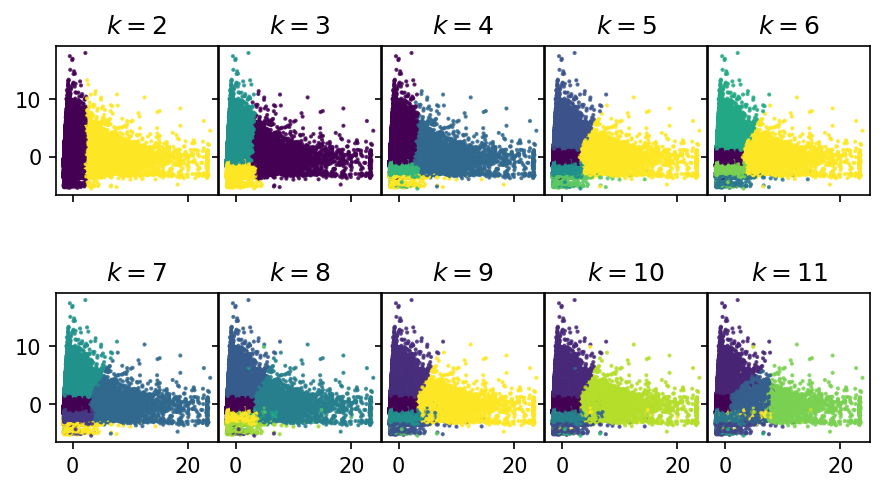

In [102]:
plot_clusters(X_listings_new, res_listings['ys']);

In [103]:
def plot_internal(inertias, chs, scs, gss, gssds):
    """Plot internal validation values"""
    fig, ax = plt.subplots()
    ks = np.arange(2, len(inertias)+2)
    ax.plot(ks, inertias, '-o', label='SSE')
    ax.plot(ks, chs, '-ro', label='CH')
    ax.set_xlabel('$k$')
    ax.set_ylabel('SSE/CH')
    lines, labels = ax.get_legend_handles_labels()
    ax2 = ax.twinx()
    ax2.errorbar(ks, gss, gssds, fmt='-go', label='Gap statistic')
    ax2.plot(ks, scs, '-ko', label='Silhouette coefficient')
    ax2.set_ylabel('Gap statistic/Silhouette')
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines+lines2, labels+labels2)
    return ax

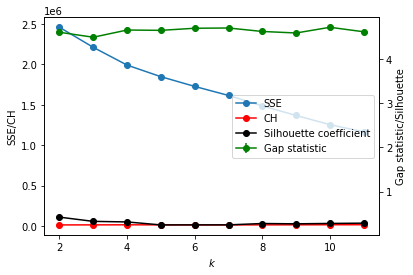

In [104]:
plot_internal(res_listings['inertias'], res_listings['chs'], res_listings['scs'], 
              res_listings['gss'], res_listings['gssds']);

# $k$-medians clustering

In [13]:
kmd = kmedians(X_listings, X_listings[:5,:], ccore=False)
kmd.process()
clusters = kmd.get_clusters()
y_predict = np.zeros(len(X_listings))
for cluster, point in enumerate(clusters):
    y_predict[point] = cluster

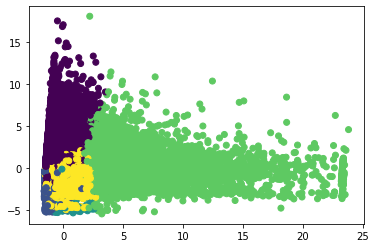

In [14]:
plt.scatter(X_listings_new[:,0], X_listings_new[:,1], c=y_predict);

## Blehbleh

In [16]:
def gap_statistic_kmedians(X, y, centroids, b):
    """Compute the gap statistic for a k-medians clusterer
    
    Parameters
    ----------
    X : array
        Design matrix with each row corresponding to a point
    y : array
        Class label of each point
    centroids : array
        Number of pairs to sample
    b : int
        Number of realizations for the reference distribution
        
    Returns
    -------
    gs : float
        Gap statistic
    gs_std : float
        Standard deviation of gap statistic
    """
    np.random.seed(1337)
    
    med_mean = np.log(pooled_within_ssd(X, y, centroids, cityblock))
    stats = []
    
    for i in range(b):
        X_i = np.random.uniform(X.min(0), X.max(0), X.shape)
        k_med = kmedians (X_i, X_i[:len(centroids),:], ccore = False)
        k_med.process()
        
        clusters = k_med.get_clusters()
        
        y_i = np.zeros(len(X_i))
        for cluster, point in enumerate(clusters):
            y_i[point] = cluster

        stats += [np.log(pooled_within_ssd(X_i,
                       y_i.astype(int),
                       np.array(k_med.get_medians()),
                       cityblock))]
        
    return (np.mean(stats)-med_mean), np.std(stats)

def cluster_range_kmedians(X, k_start, k_stop, actual=None):
    ys = []
    inertias = []
    chs = []
    scs = []
    gss = []
    gssds = []
    ps = []
    amis = []
    ars = []
    for k in range(k_start, k_stop+1):
        clusterer_k = kmedians(X, X[:k,:], ccore=False)
        
        clusterer_k.process()
        clusters = clusterer_k.get_clusters()
        y = np.zeros(len(X))
        
        for cluster, point in enumerate(clusters):
            y[point] = cluster
        
        ys.append(y)
        inertia = pooled_within_ssd(X, y,
                                     np.array(clusterer_k.get_medians()),
                                     cityblock)
        inertias.append(inertia)
        chs.append(calinski_harabasz_score(X, y))
        scs.append(silhouette_score(X, y ))
        
        if actual is not None:
            ps.append(purity(actual, y))
            amis.append(adjusted_mutual_info_score(actual, y))
            ars.append(adjusted_rand_score(actual, y))
        
#         raise NotImplementedError()

        gs = gap_statistic_kmedians(X, y, clusterer_k.get_medians(), 5)
        gss.append(gs[0])
        gssds.append(gs[1])

    result = {'ys':ys, 'inertias':inertias, 'chs':chs,
              'gss':gss, 'gssds':gssds, 'scs':scs}
    
    if actual is not None:
        result['ps'] = ps
        result['amis'] = amis
        result['ars'] = ars
        
    return result

In [19]:
res_listings = cluster_range_kmedians(X_listings, 2, 11)

KeyboardInterrupt: 

In [ ]:
plot_clusters(X_listings_new, res_listings['ys']);

In [ ]:
plot_internal(res_listings['inertias'], res_listings['chs'], res_listings['scs'], 
              res_listings['gss'], res_listings['gssds']);

# $k$-mediods clustering

In [ ]:
kmo = kmedoids(X_listings, np.arange(5), ccore=False)
kmo.process()
clusters = kmo.get_clusters()
y_predict = np.zeros(len(X_listings))
for cluster, point in enumerate(clusters):
    y_predict[point] = cluster

In [ ]:
plt.scatter(X_listings_new[:,0], X_listings_new[:,1], c=y_predict);

In [ ]:
def gap_statistic_kmedoids(X, y, centroids, b):
    """Compute the gap statistic for a k-medoids clusterer
    
    Parameters
    ----------
    X : array
        Design matrix with each row corresponding to a point
    y : array
        Class label of each point
    centroids : array
        Number of pairs to sample
    b : int
        Number of realizations for the reference distribution
        
    Returns
    -------
    gs : float
        Gap statistic
    gs_std : float
        Standard deviation of gap statistic
    """
    np.random.seed(1337)
    
    ssd = np.log(pooled_within_ssd(X, y, centroids, euclidean))
    result = []
    
    for i in range(b):
        X_i = np.random.uniform(X.min(0), X.max(0), size = X.shape)
        clusterer_k = kmedoids(X_i, np.arange(len(centroids)), ccore = False)
        clusterer_k.process()
        clusters = clusterer_k.get_clusters()
        y_i = np.zeros(len(X_i))
        
        for cluster, point in enumerate(clusters):
            y_i[point] = cluster
            
        result.append(np.log(pooled_within_ssd(X_i, y_i,
                                               X_i[clusterer_k.get_medoids()],
                                               euclidean)))
        
    return np.mean(result-ssd), np.std(result-ssd)

def cluster_range_kmedoids(X, k_start, k_stop, actual=None):
    ys = []
    inertias = []
    chs = []
    scs = []
    gss = []
    gssds = []
    ps = []
    amis = []
    ars = []
    for k in range(k_start, k_stop+1):
        clusterer_k = kmedoids(X, np.arange(k), ccore=False)
        clusterer_k.process()
        clusters = clusterer_k.get_clusters()
        
        y = np.zeros(len(X)).astype('int64')
        
        for cluster, point in enumerate(clusters):
            y[point] = cluster
        
        centers = clusterer_k.get_medoids()
        
        ys.append(y)
        inertia = np.sum([euclidean(u,v)**2 for u,v in zip (X,X[centers][y])])
        inertias.append(inertia)
        
        chs.append(calinski_harabasz_score(X,y))
        scs.append(silhouette_score(X,y))       
        
#         raise NotImplementedError()

        gs = gap_statistic_kmedoids(X, y, X[centers], 5)
        gss.append(gs[0])
        gssds.append(gs[1])

        result = {'ys':ys, 'inertias':inertias, 'chs':chs,
                  'gss':gss, 'gssds':gssds, 'scs':scs}

        if actual is not None:
            ps.append(purity(actual,y))
            amis.append(adjusted_mutual_info_score(actual,y))
            ars.append(adjusted_rand_score(actual,y))
            result['ps'] = ps
            result['amis'] = amis
            result['ars'] = ars
        
    return result

In [ ]:
res_listings = cluster_range_kmedoids(X_listings, 2, 11)

In [ ]:
plot_clusters(X_listings_new, res_listings['ys']);

In [ ]:
plot_internal(res_listings['inertias'], res_listings['chs'], res_listings['scs'],
              res_listings['gss'], res_listings['gssds']);

In [7]:
df = pd.read_csv('listings_ohe.csv')

In [14]:
df

,Unnamed: 0,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,minimum_nights,...,beds,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,0,82.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,3,...,4.0,1,0,0,0,0,0,0,0,1
1,1,59.0,98.0,10.0,10.0,10.0,10.0,10.0,10.0,3,...,2.0,1,0,0,0,0,0,0,0,1
2,2,69.0,96.0,10.0,10.0,9.0,10.0,9.0,9.0,1,...,2.0,1,0,0,0,0,0,0,0,1
3,3,41.0,95.0,9.0,9.0,10.0,9.0,10.0,10.0,10,...,4.0,1,0,0,0,0,0,0,0,1
4,5,85.0,92.0,9.0,10.0,10.0,10.0,10.0,9.0,2,...,4.0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119298,179358,200.0,100.0,8.0,10.0,10.0,10.0,10.0,10.0,2,...,3.0,1,0,0,0,0,0,0,0,1
119299,179389,100.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,2,...,2.0,1,0,0,0,0,0,0,0,1
119300,179466,75.0,100.0,10.0,10.0,10.0,10.0,10.0,8.0,1,...,2.0,0,0,1,0,0,0,0,0,1
119301,179549,81.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,...,4.0,0,0,1,0,0,0,0,0,1


In [21]:
df = pd.read_csv('listings.csv')

In [20]:
for e in [0.05, 0.04, 0.03, 0.02, 0.01]:
    result = 119303/(1+(119303 * e**2))
    print(f'{e} - {result}')

0.05 - 398.6633584789019
0.04 - 621.7428373690881
0.03 - 1100.8584265225468
0.02 - 2448.68763495152
0.01 - 9226.622738838232


In [25]:
pd.read_csv('listings.csv').bed_type.unique()

array(['Real Bed', 'Pull-out Sofa', 'Futon', 'Airbed', 'Couch', nan],
      dtype=object)